In [0]:
# Spark Context Created.. 
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
sc = spark.sparkContext

In [0]:
import matplotlib.pyplot as plt

## Captains Analysis - ODI

In [0]:
captains_odis = sc.textFile( "/FileStore/tables/captains_ODI.csv" )

#### "name", "country", "career", "matches", "won", "lost", "ties", "toss"

In [0]:
captains_odis.first()

Out[5]: 'Ponting  R T,Australia,1995-2012,230,165,51,14,124'

In [0]:
captains_odis.take(10)

Out[6]: ['Ponting  R T,Australia,1995-2012,230,165,51,14,124',
 'Fleming  S P,New Zealand,1994-2007,218,98,106,14,105',
 'Ranatunga  A,Sri Lanka,1982-1999,193,89,95,9,102',
 'Dhoni  M S*,India,2004-,186,103,68,15,88',
 'Border  A R,Australia,1979-1994,178,107,67,4,86',
 'Azharuddin  M,India,1985-2000,174,89,77,8,96',
 'Smith  G C,South Africa,2002-2013,149,91,51,7,74',
 'Ganguly  S C,India,1992-2007,147,76,66,5,74',
 'Cronje  W J,South Africa,1992-2000,140,99,37,4,74',
 'Imran Khan,Pakistan,1974-1992,139,75,59,5,70']

In [0]:
# captains_odis should be of RDD type
captains_odis.getNumPartitions()

Out[7]: 2

In [0]:
# Count the number of records
captains_odis.count()

Out[8]: 98

###### Filter the captains who have won more than 80 matches in ODIs?

In [0]:
def hasWonMoreThan(line, numOfMatches):
  tokens = line.split(',')
  if int(tokens[4]) > numOfMatches:
    return True
  else:
    return False  

In [0]:
great_captains = captains_odis.filter( lambda line: hasWonMoreThan(line, 80) )

In [0]:
great_captains.take(great_captains.count())

Out[11]: ['Ponting  R T,Australia,1995-2012,230,165,51,14,124',
 'Fleming  S P,New Zealand,1994-2007,218,98,106,14,105',
 'Ranatunga  A,Sri Lanka,1982-1999,193,89,95,9,102',
 'Dhoni  M S*,India,2004-,186,103,68,15,88',
 'Border  A R,Australia,1979-1994,178,107,67,4,86',
 'Azharuddin  M,India,1985-2000,174,89,77,8,96',
 'Smith  G C,South Africa,2002-2013,149,91,51,7,74',
 'Cronje  W J,South Africa,1992-2000,140,99,37,4,74']

In [0]:
great_captains.map(lambda row: (row.split(",")[0])).take(10)

Out[12]: ['Ponting  R T',
 'Fleming  S P',
 'Ranatunga  A',
 'Dhoni  M S*',
 'Border  A R',
 'Azharuddin  M',
 'Smith  G C',
 'Cronje  W J']

In [0]:
great_captains.map(lambda row: (row.split(",")[0], int(row.split(",")[3]))).take(10)

Out[13]: [('Ponting  R T', 230),
 ('Fleming  S P', 218),
 ('Ranatunga  A', 193),
 ('Dhoni  M S*', 186),
 ('Border  A R', 178),
 ('Azharuddin  M', 174),
 ('Smith  G C', 149),
 ('Cronje  W J', 140)]

In [0]:
great_captains.map(lambda row: (row.split(",")[0], int(row.split(",")[3]), int(row.split(",")[4]) )).take(10)

Out[14]: [('Ponting  R T', 230, 165),
 ('Fleming  S P', 218, 98),
 ('Ranatunga  A', 193, 89),
 ('Dhoni  M S*', 186, 103),
 ('Border  A R', 178, 107),
 ('Azharuddin  M', 174, 89),
 ('Smith  G C', 149, 91),
 ('Cronje  W J', 140, 99)]

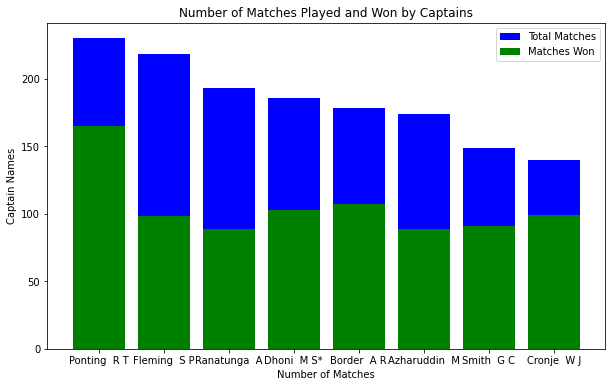

In [0]:
# Extract the data from the RDD
data = great_captains.map(lambda row: (row.split(",")[0], int(row.split(",")[3]), int(row.split(",")[4]))).take(10)

# Separate the data into three lists: names, total matches, and matches won
names = [x[0] for x in data]
total_matches = [x[1] for x in data]
matches_won = [x[2] for x in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(names, total_matches, color='blue', label='Total Matches')
plt.bar(names, matches_won, color='green', label='Matches Won')

# Add labels and title
plt.xlabel('Number of Matches')
plt.ylabel('Captain Names')
plt.title('Number of Matches Played and Won by Captains')
plt.legend()

# Show the plot
plt.show()

##### Find winning percentage of each captain:

In [0]:
def getWinningPerc(line):
  
  tokens = line.split(',')
  winPerc = round(float(tokens[4])/float(tokens[3]), 3) # win Percentage = Won/Total Matches
  
  return (tokens[0], round( winPerc*100, 1 )   ) # return (key,value). eg.('Ponting  R T', 72.0)

In [0]:
captains_odi_winPerc = captains_odis.map( lambda line: getWinningPerc(line) ) #finding winning percentage of each captain

In [0]:
#top 20 records
captains_odi_winPerc.take(20) 

Out[18]: [('Ponting  R T', 71.7),
 ('Fleming  S P', 45.0),
 ('Ranatunga  A', 46.1),
 ('Dhoni  M S*', 55.4),
 ('Border  A R', 60.1),
 ('Azharuddin  M', 51.1),
 ('Smith  G C', 61.1),
 ('Ganguly  S C', 51.7),
 ('Cronje  W J', 70.7),
 ('Imran Khan', 54.0),
 ('Jayawardene  D P M', 55.4),
 ('Lara  B C', 47.2),
 ('Jayasuriya  S T', 55.6),
 ('Wasim Akram', 60.6),
 ('Waugh  S R', 63.2),
 ('Richards  I V A', 63.8),
 ('Pollock  S M', 61.2),
 ('Inzamam-ul-Haq', 58.4),
 ('Misbah-ul-Haq*', 51.7),
 ('Richardson  R B', 52.9)]

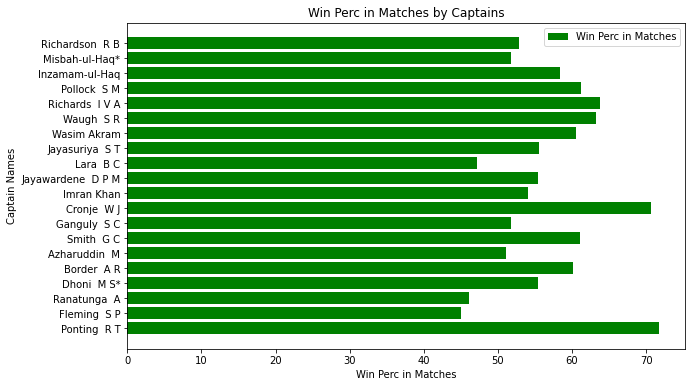

In [0]:
data=captains_odi_winPerc.take(20) 
# Separate the data into three lists: names, total matches, and matches won
names = [x[0] for x in data]
win_perc = [x[1] for x in data]
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(names, win_perc, color='green', label='Win Perc in Matches')
# Add labels and title
plt.xlabel('Win Perc in Matches')
plt.ylabel('Captain Names')
plt.title('Win Perc in Matches by Captains')
plt.legend()
# Show the plot
plt.show()

In [0]:
# Sort the RDD by the number of matches won in descending order
captains_odi_winPerc_desc = captains_odi_winPerc.sortBy(lambda x: x[1], ascending=False)
captains_odi_winPerc_desc.take(20)

Out[20]: [('Lloyd  C H', 76.2),
 ('Ponting  R T', 71.7),
 ('Mashrafe Bin Mortaza*', 71.4),
 ('Cronje  W J', 70.7),
 ('Gatting  M W', 70.3),
 ('Clarke  M J', 67.6),
 ('Shoaib Malik*', 66.7),
 ('Richards  I V A', 63.8),
 ('Waugh  S R', 63.2),
 ('Saleem Malik', 61.8),
 ('Pollock  S M', 61.2),
 ('Smith  G C', 61.1),
 ('Wasim Akram', 60.6),
 ('Border  A R', 60.1),
 ('Sangakkara  K C', 60.0),
 ('Brearley  J M', 60.0),
 ('Waqar Younis', 59.7),
 ('Moin Khan', 58.8),
 ('Inzamam-ul-Haq', 58.4),
 ('de Villiers  A B*', 57.9)]

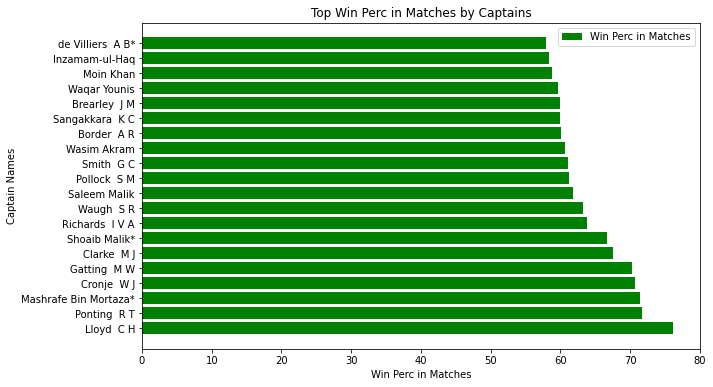

In [0]:
data=captains_odi_winPerc_desc.take(20)
# Separate the data into three lists: names, total matches, and matches won
names = [x[0] for x in data]
win_perc = [x[1] for x in data]
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(names, win_perc, color='green', label='Win Perc in Matches')
# Add labels and title
plt.xlabel('Win Perc in Matches')
plt.ylabel('Captain Names')
plt.title('Top Win Perc in Matches by Captains')
plt.legend()
# Show the plot
plt.show()

##### Top Toss Wins Percentage by Captain

In [0]:
def getWinningPercToss(line):
  
  tokens = line.split(',')
  winPerc = round(float(tokens[7])/float(tokens[3]), 3) # win Percentage = Toss Win/Total Matches
  
  return (tokens[0], round( winPerc*100, 1 )   ) # return (key,value). eg.('Ponting  R T', 72.0)

In [0]:
captains_odi_winPerc_toss = captains_odis.map( lambda line: getWinningPercToss(line) ) #finding winning percentage of each captain

In [0]:
# Sort the RDD by the number of matches won in descending order
captains_odi_winPerc_toss_desc = captains_odi_winPerc_toss.sortBy(lambda x: x[1], ascending=False)
captains_odi_winPerc_toss_desc.take(20)

Out[24]: [('Adams  J C', 69.2),
 ('Ramiz Raja', 68.2),
 ('Wright  J G', 67.7),
 ('Mohammad Ashraful', 65.8),
 ('Chigumbura  E*', 64.3),
 ('Crowe  M D', 63.6),
 ('Morgan  E J G*', 63.6),
 ('Hughes  K J', 63.3),
 ('Gower  D I', 62.5),
 ('Taylor  B R M', 61.8),
 ('Bagai  A*', 59.3),
 ('Chappell  G S', 59.2),
 ('Moin Khan', 58.8),
 ('Dravid  R', 58.2),
 ('Vettori  D L', 57.3),
 ('Tendulkar  S R', 56.9),
 ('Cook  A N*', 56.5),
 ('Utseya  P*', 56.5),
 ('Inzamam-ul-Haq', 56.2),
 ('Sangakkara  K C', 55.6)]

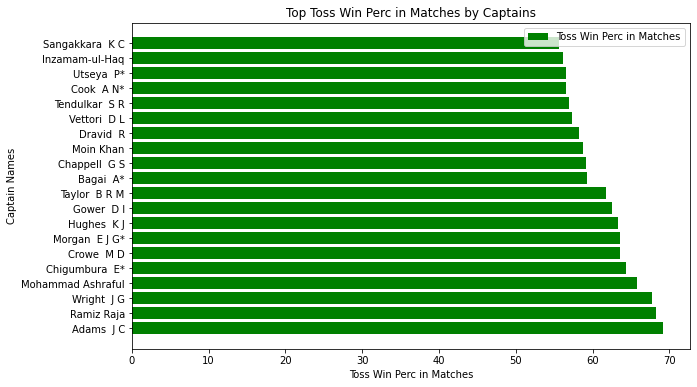

In [0]:
data=captains_odi_winPerc_toss_desc.take(20)
# Separate the data into three lists: names, total matches, and matches won
names = [x[0] for x in data]
win_perc = [x[1] for x in data]
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(names, win_perc, color='green', label='Toss Win Perc in Matches')
# Add labels and title
plt.xlabel('Toss Win Perc in Matches')
plt.ylabel('Captain Names')
plt.title('Top Toss Win Perc in Matches by Captains')
plt.legend()
# Show the plot
plt.show()

##### Some More Analysis : Captains with the Highest Win/Loss Ratio

In [0]:
captains_odis.map(lambda row: (row.split(",")[0], int(row.split(",")[4]), int(row.split(",")[5]))).take(20)

Out[26]: [('Ponting  R T', 165, 51),
 ('Fleming  S P', 98, 106),
 ('Ranatunga  A', 89, 95),
 ('Dhoni  M S*', 103, 68),
 ('Border  A R', 107, 67),
 ('Azharuddin  M', 89, 77),
 ('Smith  G C', 91, 51),
 ('Ganguly  S C', 76, 66),
 ('Cronje  W J', 99, 37),
 ('Imran Khan', 75, 59),
 ('Jayawardene  D P M', 72, 49),
 ('Lara  B C', 59, 59),
 ('Jayasuriya  S T', 65, 47),
 ('Wasim Akram', 66, 41),
 ('Waugh  S R', 67, 35),
 ('Richards  I V A', 67, 36),
 ('Pollock  S M', 60, 34),
 ('Inzamam-ul-Haq', 52, 33),
 ('Misbah-ul-Haq*', 45, 39),
 ('Richardson  R B', 46, 36)]

In [0]:
captain_win_loss=captains_odis.map(lambda row: (row.split(",")[0], int(row.split(",")[4]), int(row.split(",")[5])))

In [0]:
def getWinLossRatio(line):
  
  tokens = line.split(',')
  ratio = round(float(tokens[4])/float(tokens[5]), 3) # win Loss ratio = Toss Win/Total Los
  
  return (tokens[0], ratio   ) # return (key,value). eg.('Ponting  R T',X )

In [0]:
captains_odi_winloss_ratio = captains_odis.map( lambda x: getWinLossRatio(x) ) #finding winning percentage of each captain

In [0]:
captains_odi_winloss_ratio.take(10)

Out[30]: [('Ponting  R T', 3.235),
 ('Fleming  S P', 0.925),
 ('Ranatunga  A', 0.937),
 ('Dhoni  M S*', 1.515),
 ('Border  A R', 1.597),
 ('Azharuddin  M', 1.156),
 ('Smith  G C', 1.784),
 ('Ganguly  S C', 1.152),
 ('Cronje  W J', 2.676),
 ('Imran Khan', 1.271)]

In [0]:
captains_odi_winloss_ratio.sortByKey().take(10)

Out[31]: [('Aamir Sohail', 0.75),
 ('Adams  J C', 0.714),
 ('Atapattu  M S', 1.296),
 ('Atherton  M A', 0.952),
 ('Azharuddin  M', 1.156),
 ('Bagai  A*', 0.444),
 ('Bailey  G J*', 1.6),
 ('Border  A R', 1.597),
 ('Borren  P W*', 0.526),
 ('Bravo  D J J*', 0.889)]

In [0]:
captains_odi_winloss_ratio.sortBy(   lambda x: x[1], ascending=False).take(10)

Out[32]: [('Lloyd  C H', 3.556),
 ('Ponting  R T', 3.235),
 ('Cronje  W J', 2.676),
 ('Mashrafe Bin Mortaza*', 2.5),
 ('Clarke  M J', 2.381),
 ('Gatting  M W', 2.364),
 ('Shoaib Malik*', 2.0),
 ('Sangakkara  K C', 1.929),
 ('Waugh  S R', 1.914),
 ('Saleem Malik', 1.909)]

##### Total number of matches played by each country:

In [0]:
#getting the number of matches per captain
captains_odis.map(lambda row: (row.split(",")[1], int(row.split(",")[3]))).take(10)

Out[33]: [('Australia', 230),
 ('New Zealand', 218),
 ('Sri Lanka', 193),
 ('India', 186),
 ('Australia', 178),
 ('India', 174),
 ('South Africa', 149),
 ('India', 147),
 ('South Africa', 140),
 ('Pakistan', 139)]

In [0]:
countries_matches=captains_odis.map(lambda row: (row.split(",")[1], int(row.split(",")[3])))

In [0]:
#Grouping the values of matches played by each countriy under different captains to lists

countries_matches_all =( captains_odis.map(lambda row: (row.split(",")[1], int(row.split(",")[3])))
.groupByKey()
.mapValues(list) )

In [0]:
countries_matches_all.take(countries_matches_all.count())

Out[36]: [('Australia', [230, 178, 106, 74, 67, 50, 49, 49, 29]),
 ('India', [186, 174, 147, 79, 74, 72, 38]),
 ('South Africa', [149, 140, 98, 76]),
 ('Pakistan', [139, 109, 89, 87, 62, 62, 38, 36, 34, 34, 25, 22, 22, 22]),
 ('West Indies', [125, 105, 87, 84, 53, 50, 49, 43, 36, 26]),
 ('Kenya', [73, 21, 20]),
 ('Ireland', [61, 32]),
 ('Netherlands', [31]),
 ('Bermuda', [31]),
 ('New Zealand', [218, 82, 60, 55, 44, 37, 36, 31, 25, 20]),
 ('Sri Lanka', [193, 130, 117, 75, 63, 61, 45, 26]),
 ('Zimbabwe', [86, 69, 68, 56, 52, 34, 29]),
 ('England', [69, 62, 60, 56, 50, 43, 41, 37, 33, 29, 25, 25, 24]),
 ('Bangladesh', [69, 49, 38, 37, 30, 28]),
 ('Afghanistan', [28, 22]),
 ('Canada', [27])]

In [0]:
countries_total_matches_played = countries_matches.groupByKey().mapValues(sum) 
countries_total_matches_played.take(countries_total_matches_played.count())

Out[37]: [('Australia', 832),
 ('India', 770),
 ('South Africa', 463),
 ('Pakistan', 781),
 ('West Indies', 658),
 ('Kenya', 114),
 ('Ireland', 93),
 ('Netherlands', 31),
 ('Bermuda', 31),
 ('New Zealand', 608),
 ('Sri Lanka', 710),
 ('Zimbabwe', 394),
 ('England', 554),
 ('Bangladesh', 251),
 ('Afghanistan', 50),
 ('Canada', 27)]

###### Countries Played more than 100 matches

In [0]:
filtered_countries = countries_total_matches_played.filter(lambda x: x[1] > 100).sortBy(lambda x: x[1], ascending=False)
filtered_countries.take(filtered_countries.count())

Out[38]: [('Australia', 832),
 ('Pakistan', 781),
 ('India', 770),
 ('Sri Lanka', 710),
 ('West Indies', 658),
 ('New Zealand', 608),
 ('England', 554),
 ('South Africa', 463),
 ('Zimbabwe', 394),
 ('Bangladesh', 251),
 ('Kenya', 114)]

#### Sort countries by the percentage of matches they have won

In [0]:
# Parse the data and calculate winning percentage for each country
country_data_captain = captains_odis.map(lambda line: line.split(",")).map(lambda x: (x[1], int(x[3]), int(x[4])))

# country
country_data_captain.take(20)

Out[39]: [('Australia', 230, 165),
 ('New Zealand', 218, 98),
 ('Sri Lanka', 193, 89),
 ('India', 186, 103),
 ('Australia', 178, 107),
 ('India', 174, 89),
 ('South Africa', 149, 91),
 ('India', 147, 76),
 ('South Africa', 140, 99),
 ('Pakistan', 139, 75),
 ('Sri Lanka', 130, 72),
 ('West Indies', 125, 59),
 ('Sri Lanka', 117, 65),
 ('Pakistan', 109, 66),
 ('Australia', 106, 67),
 ('West Indies', 105, 67),
 ('South Africa', 98, 60),
 ('Pakistan', 89, 52),
 ('Pakistan', 87, 45),
 ('West Indies', 87, 46)]

In [0]:
# Sum the values with the same keys
summed_data_country = country_data_captain.map(lambda x: (x[0], (x[1], x[2]))).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

In [0]:
summed_data_country.take(20)

Out[41]: [('Australia', (832, 503)),
 ('India', (770, 387)),
 ('South Africa', (463, 294)),
 ('Pakistan', (781, 422)),
 ('West Indies', (658, 342)),
 ('Kenya', (114, 34)),
 ('Ireland', (93, 42)),
 ('Netherlands', (31, 10)),
 ('Bermuda', (31, 6)),
 ('New Zealand', (608, 276)),
 ('Sri Lanka', (710, 350)),
 ('Zimbabwe', (394, 107)),
 ('England', (554, 275)),
 ('Bangladesh', (251, 95)),
 ('Afghanistan', (50, 25)),
 ('Canada', (27, 8))]

In [0]:
# Transform the RDD to the desired format
transformed_rdd = summed_data_country.map(lambda x: (x[0], x[1][0], x[1][1],  round( x[1][1] / x[1][0], 4)    ))

In [0]:
transformed_rdd.take(20)

Out[43]: [('Australia', 832, 503, 0.6046),
 ('India', 770, 387, 0.5026),
 ('South Africa', 463, 294, 0.635),
 ('Pakistan', 781, 422, 0.5403),
 ('West Indies', 658, 342, 0.5198),
 ('Kenya', 114, 34, 0.2982),
 ('Ireland', 93, 42, 0.4516),
 ('Netherlands', 31, 10, 0.3226),
 ('Bermuda', 31, 6, 0.1935),
 ('New Zealand', 608, 276, 0.4539),
 ('Sri Lanka', 710, 350, 0.493),
 ('Zimbabwe', 394, 107, 0.2716),
 ('England', 554, 275, 0.4964),
 ('Bangladesh', 251, 95, 0.3785),
 ('Afghanistan', 50, 25, 0.5),
 ('Canada', 27, 8, 0.2963)]

In [0]:
transformed_rdd.sortBy(lambda x: x[3], ascending=False).take(20)


Out[44]: [('South Africa', 463, 294, 0.635),
 ('Australia', 832, 503, 0.6046),
 ('Pakistan', 781, 422, 0.5403),
 ('West Indies', 658, 342, 0.5198),
 ('India', 770, 387, 0.5026),
 ('Afghanistan', 50, 25, 0.5),
 ('England', 554, 275, 0.4964),
 ('Sri Lanka', 710, 350, 0.493),
 ('New Zealand', 608, 276, 0.4539),
 ('Ireland', 93, 42, 0.4516),
 ('Bangladesh', 251, 95, 0.3785),
 ('Netherlands', 31, 10, 0.3226),
 ('Kenya', 114, 34, 0.2982),
 ('Canada', 27, 8, 0.2963),
 ('Zimbabwe', 394, 107, 0.2716),
 ('Bermuda', 31, 6, 0.1935)]

#### Sorting

In [0]:
#sort the values numerically

countries_total_matches_played_sort= countries_total_matches_played.sortBy(lambda x: x[1], ascending=False)
countries_total_matches_played_sort.take(countries_total_matches_played_sort.count())

Out[45]: [('Australia', 832),
 ('Pakistan', 781),
 ('India', 770),
 ('Sri Lanka', 710),
 ('West Indies', 658),
 ('New Zealand', 608),
 ('England', 554),
 ('South Africa', 463),
 ('Zimbabwe', 394),
 ('Bangladesh', 251),
 ('Kenya', 114),
 ('Ireland', 93),
 ('Afghanistan', 50),
 ('Netherlands', 31),
 ('Bermuda', 31),
 ('Canada', 27)]

In [0]:
#sort the values alphabetically

countries_total_matches_played_sort= countries_total_matches_played.sortByKey(ascending=True)
countries_total_matches_played_sort.take(countries_total_matches_played_sort.count())

Out[46]: [('Afghanistan', 50),
 ('Australia', 832),
 ('Bangladesh', 251),
 ('Bermuda', 31),
 ('Canada', 27),
 ('England', 554),
 ('India', 770),
 ('Ireland', 93),
 ('Kenya', 114),
 ('Netherlands', 31),
 ('New Zealand', 608),
 ('Pakistan', 781),
 ('South Africa', 463),
 ('Sri Lanka', 710),
 ('West Indies', 658),
 ('Zimbabwe', 394)]

##### Statistical Analysis

In [0]:
import statistics
# Parameters used for Statistical analysis
# minimum -> minimumum no. of matches captained by captain for a country
# maximum -> maximum no. of matches captained by captain for a country
# mean -> mean of no. of matches captained by captain for a country
# median -> median of no. of matches captained by captain for a country
# Stats for ('Australia', [230, 178, 106, 74, 67, 50, 49, 49, 29])
# eg. for Australia stats are {'min': 29, 'max': 230, 'mean': 92.44, 'median': 67}
def getStats(vals):
  minimum = min(vals)
  maximum = max(vals)
  mean = statistics.mean(vals)
  median = statistics.median(vals)  
  
  return {"min": minimum,
          "max": maximum,
          "mean": round(mean, 2),
          "median": round(median, 2)}  

In [0]:
stats_matches_captained = countries_matches.groupByKey().mapValues(getStats)

In [0]:
stats_matches_captained.take(stats_matches_captained.count()) 

Out[49]: [('Australia', {'min': 29, 'max': 230, 'mean': 92.44, 'median': 67}),
 ('India', {'min': 38, 'max': 186, 'mean': 110, 'median': 79}),
 ('South Africa', {'min': 76, 'max': 149, 'mean': 115.75, 'median': 119.0}),
 ('Pakistan', {'min': 22, 'max': 139, 'mean': 55.79, 'median': 37.0}),
 ('West Indies', {'min': 26, 'max': 125, 'mean': 65.8, 'median': 51.5}),
 ('Kenya', {'min': 20, 'max': 73, 'mean': 38, 'median': 21}),
 ('Ireland', {'min': 32, 'max': 61, 'mean': 46.5, 'median': 46.5}),
 ('Netherlands', {'min': 31, 'max': 31, 'mean': 31, 'median': 31}),
 ('Bermuda', {'min': 31, 'max': 31, 'mean': 31, 'median': 31}),
 ('New Zealand', {'min': 20, 'max': 218, 'mean': 60.8, 'median': 40.5}),
 ('Sri Lanka', {'min': 26, 'max': 193, 'mean': 88.75, 'median': 69.0}),
 ('Zimbabwe', {'min': 29, 'max': 86, 'mean': 56.29, 'median': 56}),
 ('England', {'min': 24, 'max': 69, 'mean': 42.62, 'median': 41}),
 ('Bangladesh', {'min': 28, 'max': 69, 'mean': 41.83, 'median': 37.5}),
 ('Afghanistan', {'min